In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
import os
import seaborn as sns
from scipy import stats


In [3]:
df = pd.read_csv('C:/Users/SHIBASISH/Customers.csv')
print(df.shape)

(2000, 8)


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [6]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [10]:
df.isnull()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [12]:
#Removing missing values
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [14]:
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [15]:
unique_values = df['Profession'].unique()

print(unique_values)

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']


In [16]:
#Dividing columns into categorical and numerical data types

categorical = []
numerical = []
for column in df.columns:
    if df[column].nunique()>50:
        numerical.append(column)
    else:
        categorical.append(column)

In [17]:
categorical

['Gender', 'Profession', 'Work Experience', 'Family Size']

In [18]:
numerical

['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)']

# Univariate Analysis

# Categorical

Text(0.5, 1.0, 'Family Size')

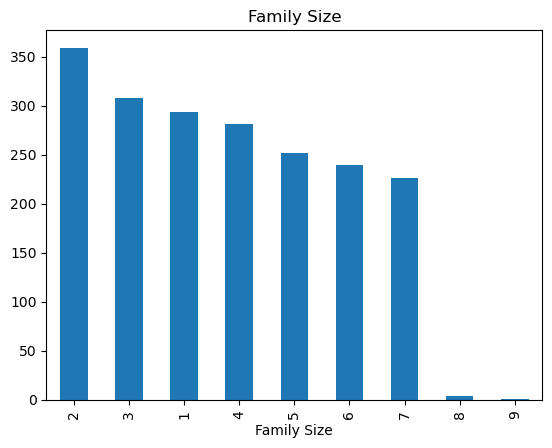

In [19]:
df['Family Size'].value_counts().plot(kind="bar")
plt.title('Family Size')

In [20]:
df['Family Size'].value_counts()

Family Size
2    359
3    308
1    294
4    281
5    252
6    240
7    226
8      4
9      1
Name: count, dtype: int64

Since the number of customers with family size more than 7 is very less, we drop them.

In [21]:
df.drop(df[df['Family Size'].isin([8, 9])].index, inplace=True)

Text(0.5, 1.0, 'Family Size')

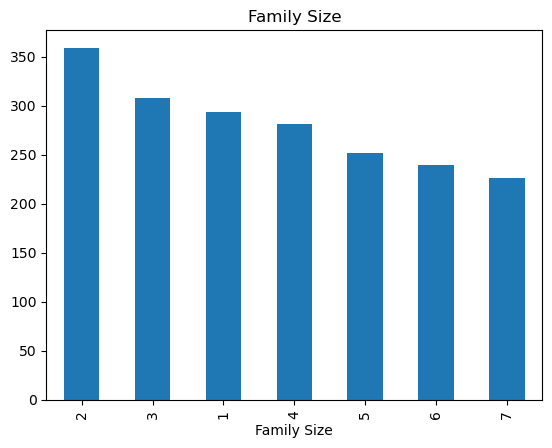

In [22]:
df['Family Size'].value_counts().plot(kind="bar")
plt.title('Family Size')

The majority of customers have small family sizes which decrease almost linearly

Text(0.5, 1.0, 'Profession')

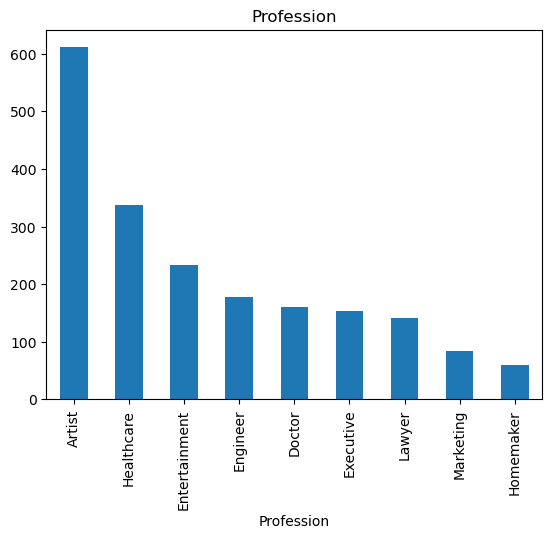

In [23]:
df['Profession'].value_counts().plot(kind="bar")
plt.title('Profession')

In [24]:
df['Profession'].value_counts()

Profession
Artist           611
Healthcare       337
Entertainment    234
Engineer         178
Doctor           161
Executive        153
Lawyer           141
Marketing         85
Homemaker         60
Name: count, dtype: int64

From this data we can conclude that majority of the customers at the shop are artists

Text(0.5, 1.0, 'Gender Distribution')

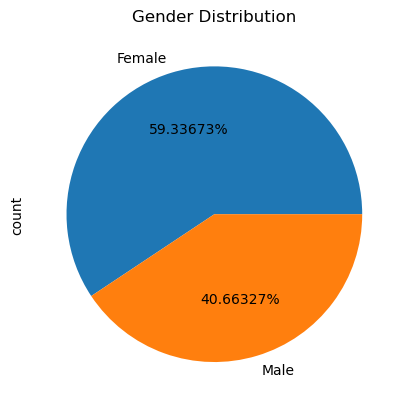

In [25]:
df['Gender'].value_counts().plot(kind="pie",autopct="%1.5f%%")
plt.title('Gender Distribution')

Customers also tend to be majorly female 

# Numerical

C:\Users\SHIBASISH\AppData\Local\Temp\ipykernel_23216\4041224163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


Text(0.5, 1.0, 'Age Distribution')

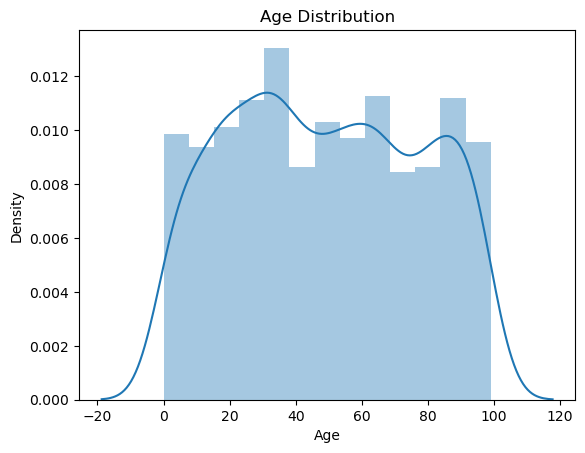

In [26]:
sns.distplot(df['Age'])
plt.title('Age Distribution')

In [27]:
df['Age'].skew()

0.05095270683162904

C:\Users\SHIBASISH\AppData\Local\Temp\ipykernel_23216\3910937958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income ($)'])


Text(0.5, 1.0, 'Income Distribution')

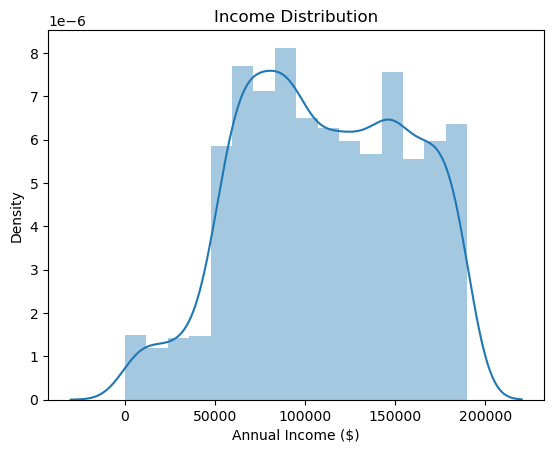

In [28]:
sns.distplot(df['Annual Income ($)'])
plt.title('Income Distribution')

Most people have an annual income of over $50,000.

In [29]:
df['Annual Income ($)'].skew()

-0.11661370973579502

In [30]:
df['Annual Income ($)'].describe()

count      1960.000000
mean     110722.463265
std       45794.313577
min           0.000000
25%       74452.000000
50%      110045.000000
75%      149136.500000
max      189974.000000
Name: Annual Income ($), dtype: float64

In [31]:
print("Median Income: ",df['Annual Income ($)'].median())

Median Income:  110045.0


Text(0.5, 1.0, 'Box Plot of Annual Income')

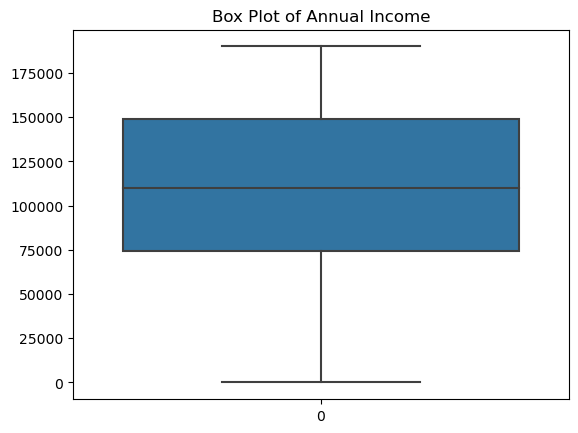

In [32]:
sns.boxplot(df['Annual Income ($)'])
plt.title('Box Plot of Annual Income')

# Bivariate Analysis

# Numerical - Numerical

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income ($)'>

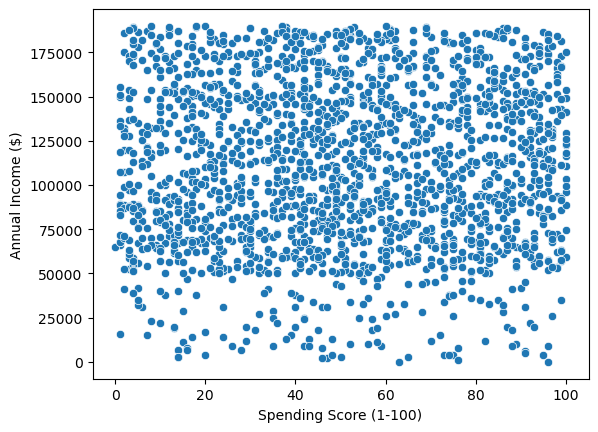

In [33]:
sns.scatterplot(data = df,x="Spending Score (1-100)",y="Annual Income ($)")

From the scatterplot we see that there is no correlation between annual income and the spending score of the customer. So annual income and spending score are unrelated.

# Categorical - Numerical

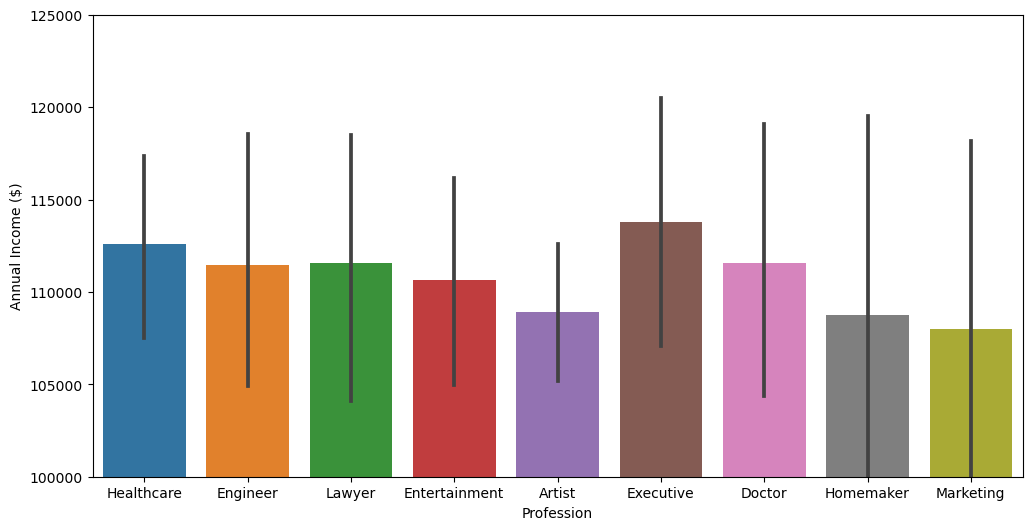

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x="Profession",y="Annual Income ($)")
plt.ylim(100000, 125000)
plt.show()

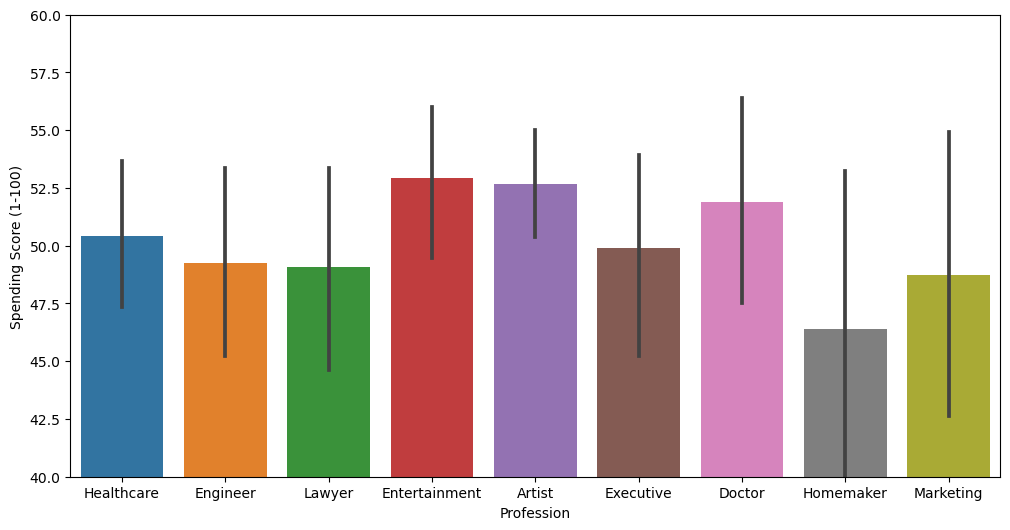

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df, x = "Profession", y = "Spending Score (1-100)")
plt.ylim(40,60)
plt.show()

From the above two plots we can see that even though the annual income of artists and customers engaged in the entertainment industry tend to be low, their spending score is high indicating that products in the store appeal more to them. 

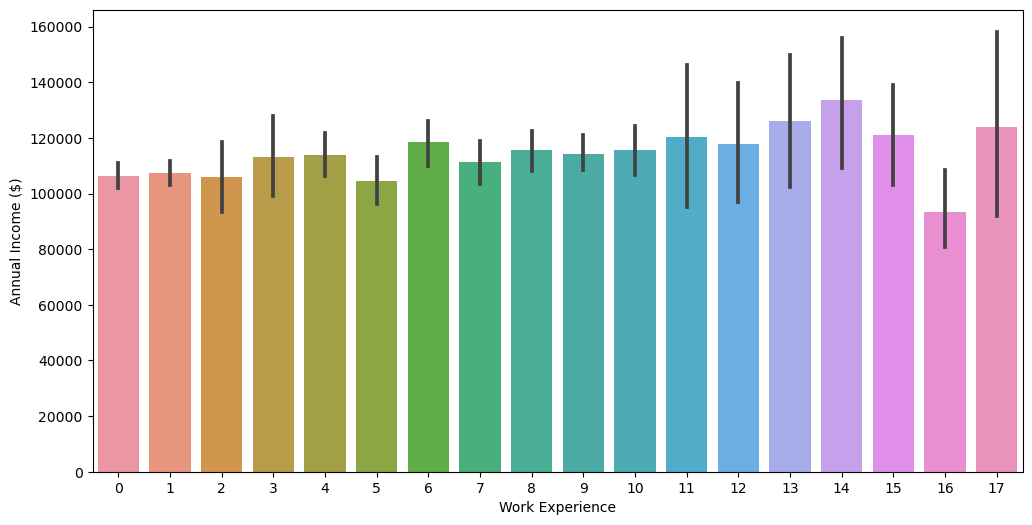

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x="Work Experience",y="Annual Income ($)")
plt.show()

There is a slight increase in annual income with work experience up to 14 years, after which the trend becomes irregular.

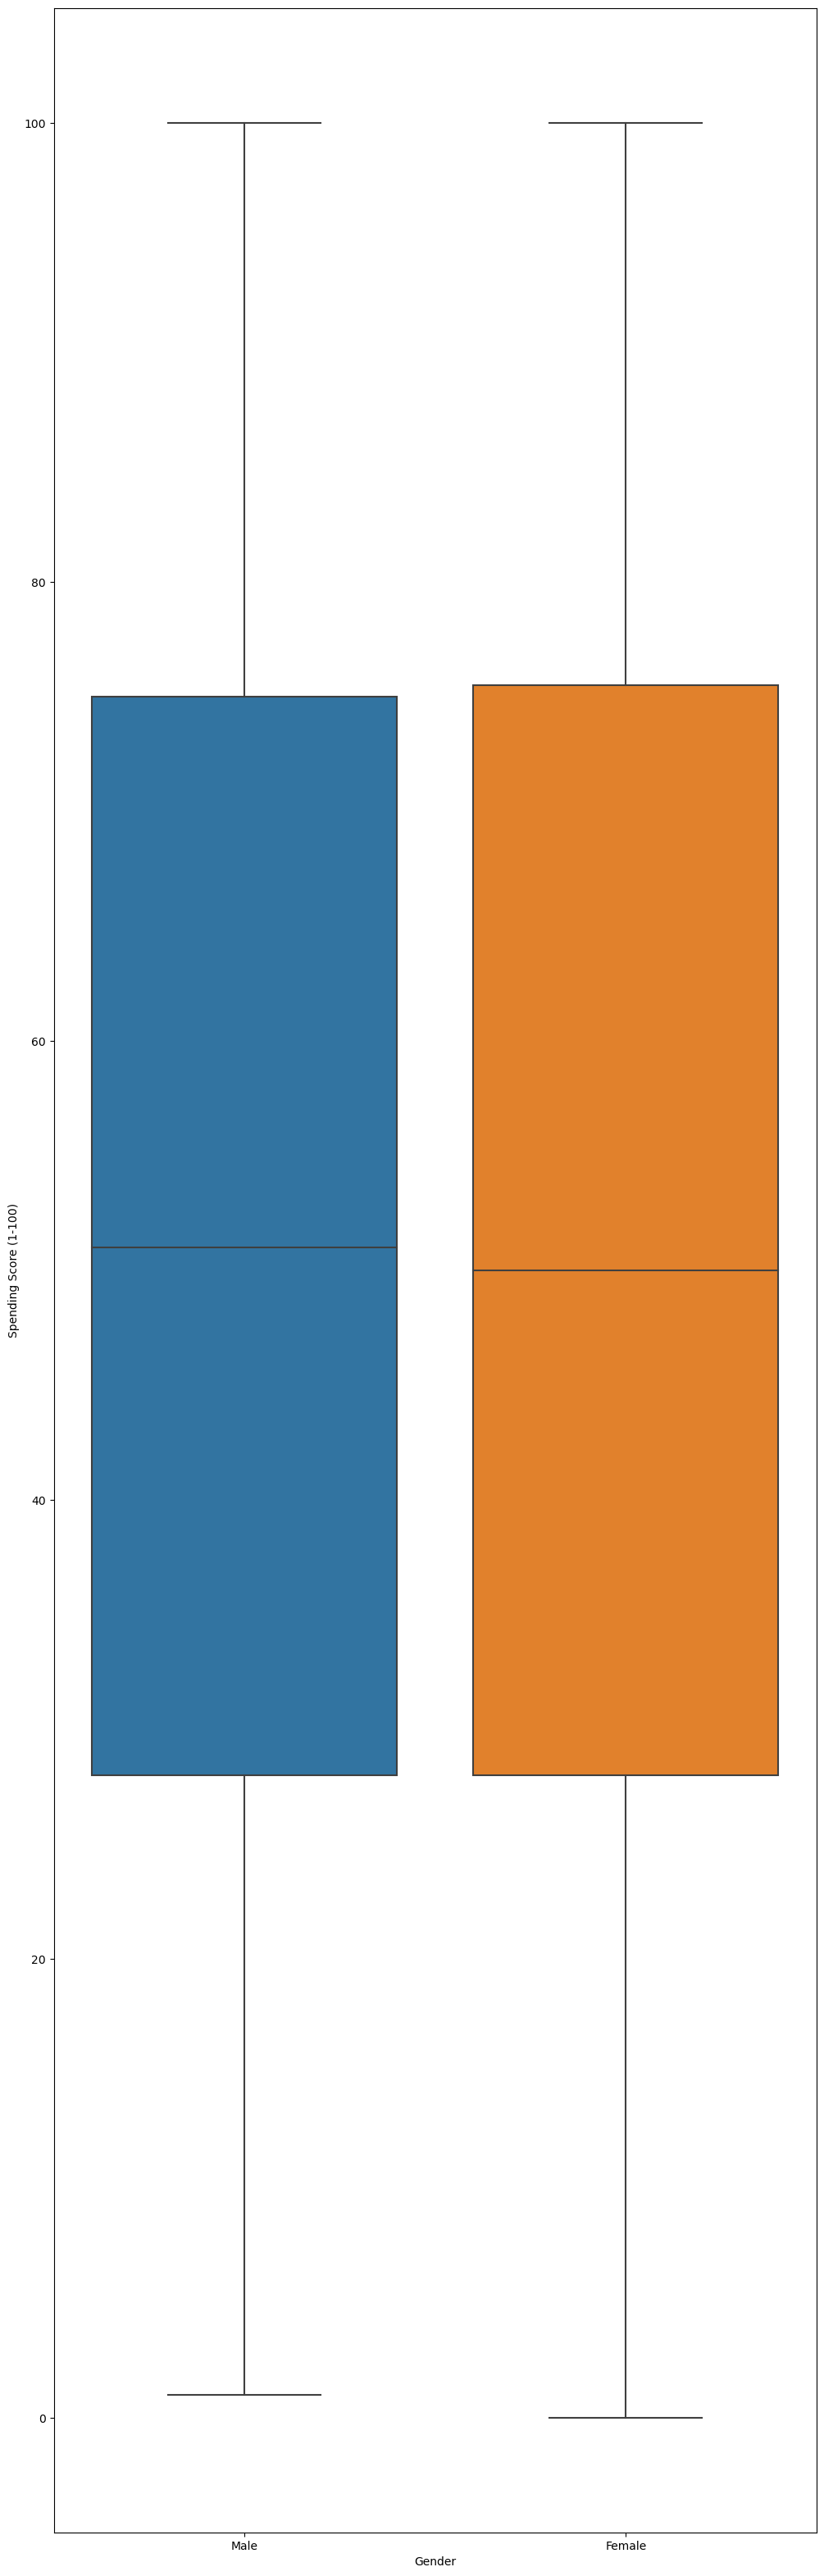

In [37]:
plt.figure(figsize=(12, 40))
sns.boxplot(data=df, x="Gender", y="Spending Score (1-100)")
plt.show()

From the boxplot we can see that although the median spending score of male customers tend to be higher, the Q3(75th percentile) score of female customers is higher indicating that the top 25 % of female customers spend more than the top 25 % of male customers.

# Categorical - Categorical

In [38]:
pd.crosstab(df['Profession'],df['Family Size'])

Family Size,1,2,3,4,5,6,7
Profession,,,,,,,
Artist,98,115,100,86,74,80,58
Doctor,26,36,25,17,15,19,23
Engineer,32,35,20,32,26,18,15
Entertainment,30,45,33,32,33,29,32
Executive,16,22,31,22,25,18,19
Healthcare,44,53,56,54,47,42,41
Homemaker,8,11,6,12,6,2,15
Lawyer,27,30,18,14,17,22,13
Marketing,13,12,19,12,9,10,10


<Axes: xlabel='Family Size', ylabel='Profession'>

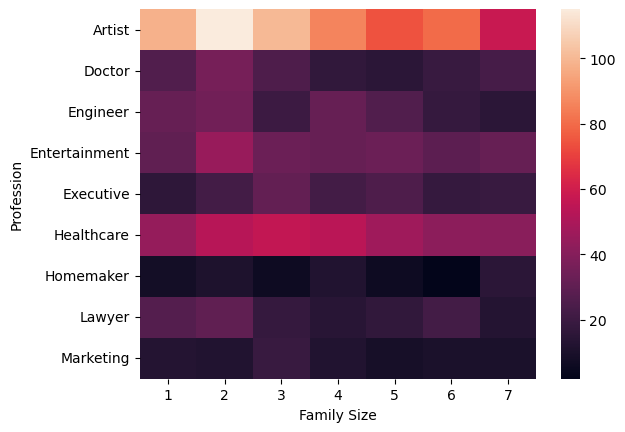

In [39]:
sns.heatmap(pd.crosstab(df['Profession'],df['Family Size']))

# Conclusions

1) The business should target artists as their primary customers since they make up the majority and tend to spend relatively more.

2) They should focus on creating products tailored to high-income professionals, such as doctors, executives, and healthcare workers, to enhance business growth.

3) They should develop more premium products specifically for their top female customers.

4) Since males have a higher median overall spending, the business should focus on increasing the number of male customers to boost the percentage of male clientele.